# Time Series Forecasting project

### Built a model to Forecast monthly sales of  Rose Wine for certain Wine Estate for the next 12 month

### Packages Used:

In [1]:
# General
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
sns.set()
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.tsa.holtwinters as ets
import statsmodels.tools.eval_measures as fa
from sklearn.metrics import  mean_squared_error
from sklearn import metrics
from datetime import datetime
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
from pandas  import  Grouper, concat
import calendar
import  statsmodels.api as  sm
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [4]:
os.getcwd()

'C:\\Users\\msair\\JUPYTER NOTES'

In [5]:
os.chdir("C:\\Users\\msair\\Downloads")

In [6]:
rosedf = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
rosedf.head().to_csv('rose_head.csv')
rosedf.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [7]:
print('First 5 rows of Data')
rosedf.head()

First 5 rows of Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [8]:
print('Last 5 rows of Data')
rosedf.tail()

Last 5 rows of Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


* All values are properly loaded for the dataset with the index as pandas datetime format.
* The 'Rose' Time series has values in float64 datatype format.

## 1. Read the data as an appropriate Time Series data and plot the data.

**Creating the Time Stamps and adding to the data frame to make it a Time Series Data**

**Handling Null values is crucial because it is Time Series data. Since the Time Series data must be continuous, the null values cannot be omitted and must instead be appropriately imputed.**

### Checking for Null values:


**Imputing the Null Values:**

In [9]:
rose= rosedf.interpolate()
print(rose)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


In [10]:
print('The number of Null values in Rose dataset:')
print(rose.isnull().sum())

The number of Null values in Rose dataset:
Rose    0
dtype: int64


### Plotting the Rose Time Series:


Monthly Sales Data of Rose Wines:


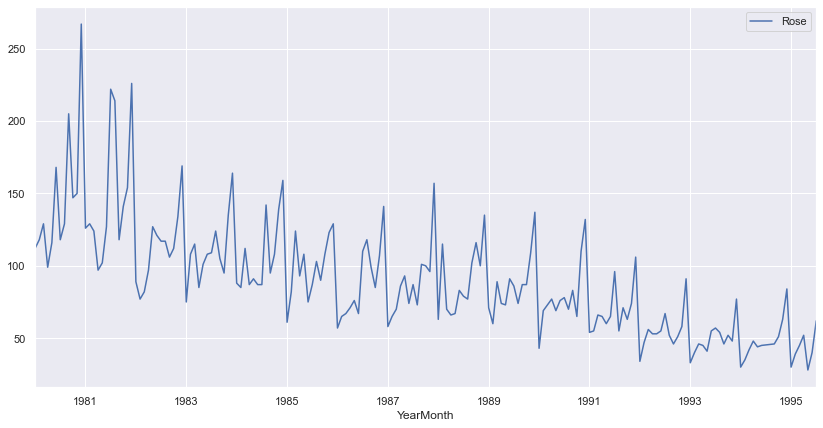

In [11]:
print('Monthly Sales Data of Rose Wines:')
rose.plot();

* A decreasing Trend could be observed with a multiplicative seasonality present.
* The Null values could be observed as a break in the plot for the observed timestamps.

* The missing values are imputed using polynomial interpolation of order 2. The new values for the index '1994-07-01' is 45.36 and for index '1994-08-01' is 44.28 approximately.
* Note that the although the sales numbers should be whole numbers but here we are getting float values due to interpolation. The values are kept as it is and not rounded off.

Monthly Sales Data of Rose Wines after missing value treatment:


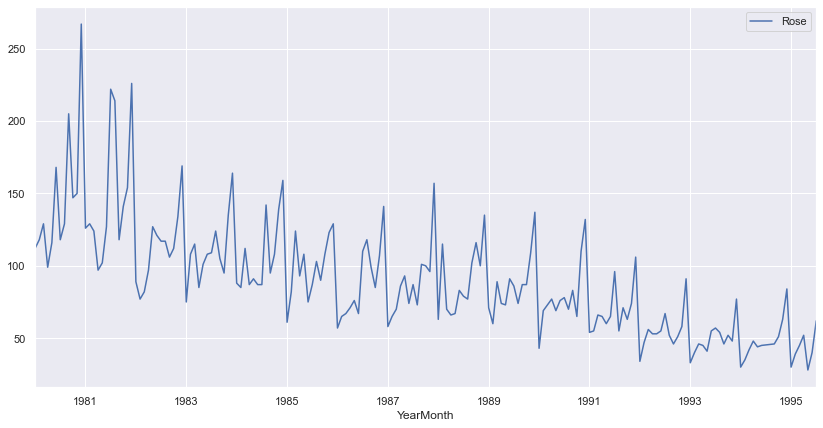

In [12]:
print('Monthly Sales Data of Rose Wines after missing value treatment:')
rose.plot();

* The plot now could be observed with no missing values.


## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

**Check the basic measures of descriptive statistics**

In [13]:
rose.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


* The Time Series' mean value and median values are very similar. Given that it is a time series, it could indicate the presence of a declinating trend and multiplicative seasonality.

### Univariate Time Series Analysis
A univariate time series is a series with single-time stamped variable at time t . Here the dataset belongs to the Sparkling Wine sales from the January of 1980 to July of 1995 .Here Sparkling wine is time -dependent variable. The series is a monthly series ,wherein for each month between Jan -1980 and July -1995 a datapoint is recorded.

**Yearly Boxplot**

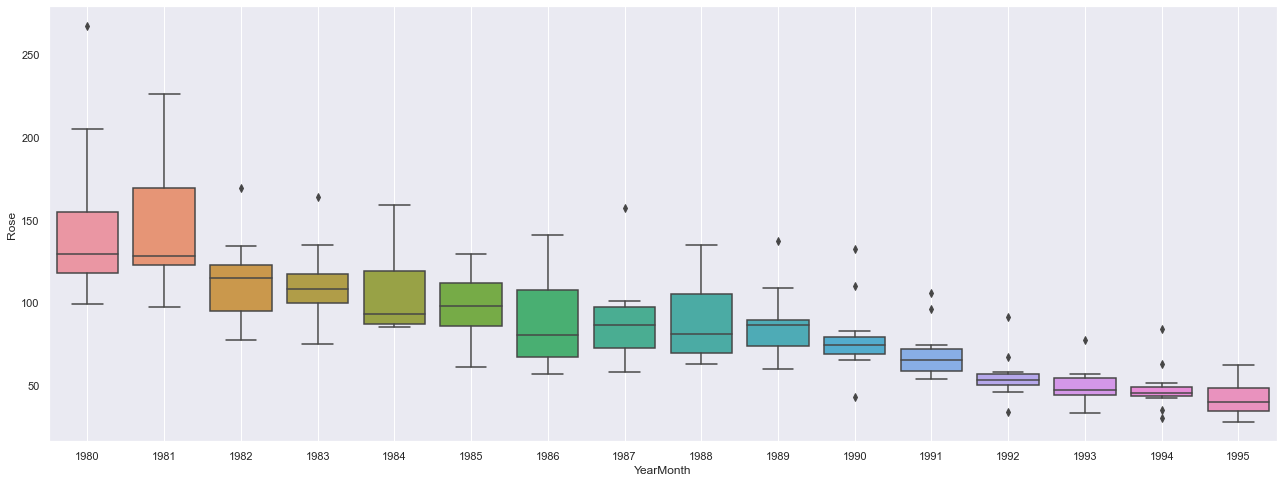

In [14]:
plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.year,y = rose['Rose'],)
plt.grid();

* It shows that there is a yearly decreasing Trend present.


**Monthly Plot**

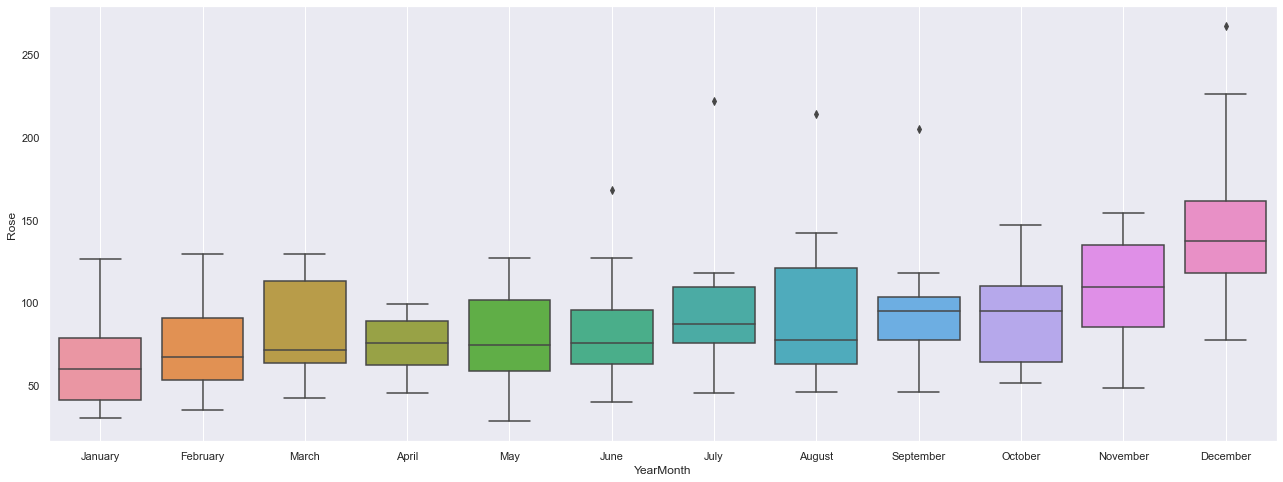

In [15]:
plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.month_name(),y = rose['Rose'])
plt.grid();

* The monthly plot shows that certain months have higher values than others indicating presence of seasonality.

**Plot a graph of monthly Sales across years.**


In [16]:
monthly_sales_across_years_rose = pd.pivot_table(pd.DataFrame(rose), columns = rose.index.month, 
                                                      index = rose.index.year)
monthly_sales_across_years_rose


Rose                                                            \
YearMonth     1      2      3     4      5      6           7           8    
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

                                       
YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

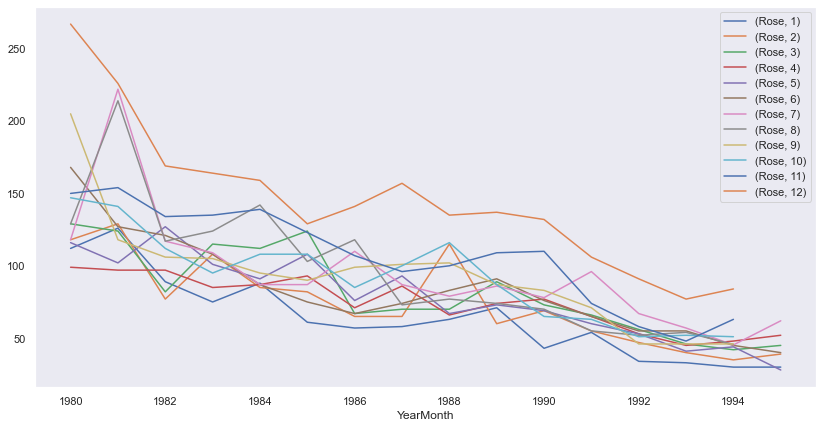

In [17]:
monthly_sales_across_years_rose.plot()
plt.grid()
plt.legend(loc='best');

* A decreasing Trend could be observed for the different months along the Years.
* Certain months have comparitively higher values throughout the years.

In [18]:
df_yearly_sum = rose.resample('A').sum()
df_yearly_sum.head()

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


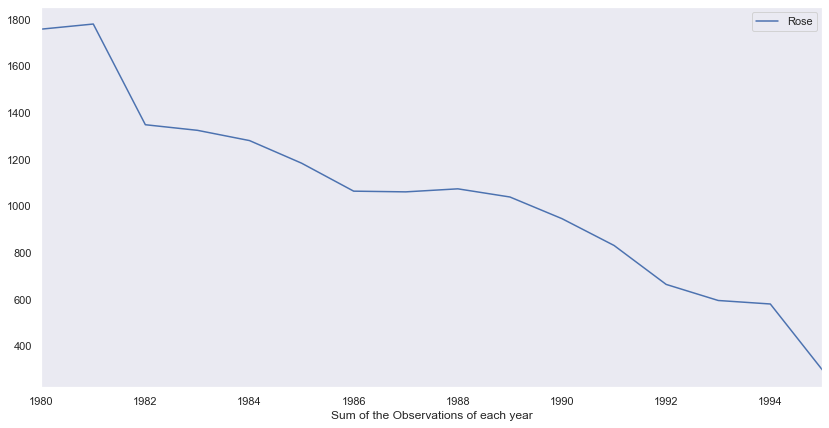

In [19]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

* This particular graph tells us what percentage of data points refer to what number of Sales.

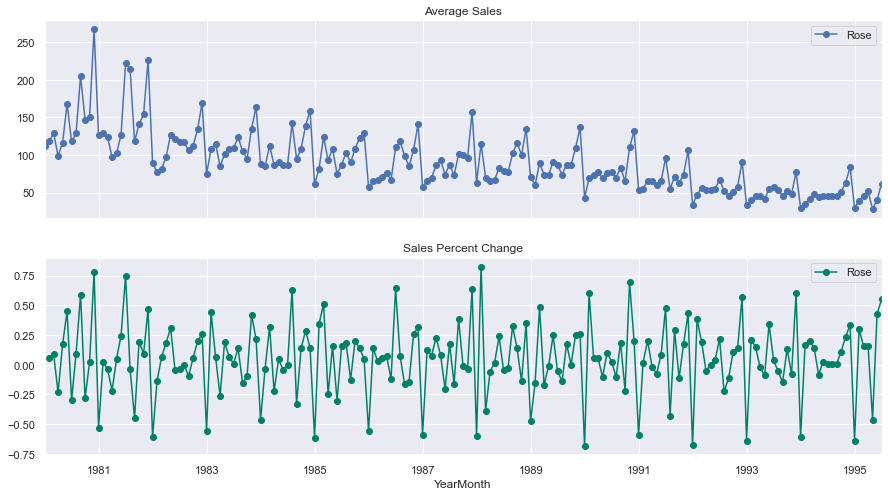

In [20]:
# group by date and get average Sales, and precent change
average    = rose.groupby(rose.index).mean()
pct_change = rose.groupby(rose.index).sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

* There certain higher percentage changes between months present periodically suggesting presence of Seasonality.


In [21]:
df_daily_sum = rose.resample('D').sum()
df_daily_sum

,Rose
YearMonth,
1980-01-01,112.0
1980-01-02,0.0
1980-01-03,0.0
1980-01-04,0.0
1980-01-05,0.0
...,...
1995-06-27,0.0
1995-06-28,0.0
1995-06-29,0.0


**Decompose the Time Series and plot the different components.**

In [22]:
import statsmodels.api as sm

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

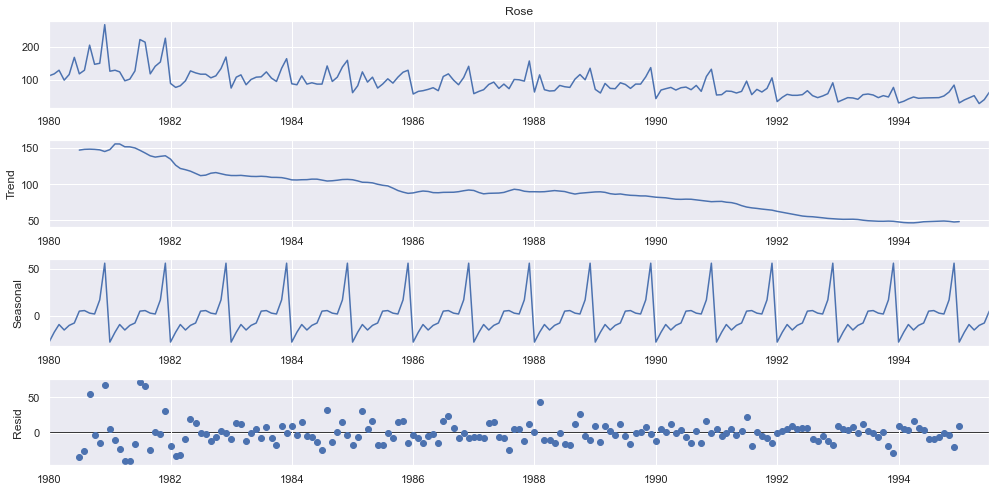

In [24]:
decomposition_a = seasonal_decompose(rose['Rose'],model='additive')
decomposition_a.plot();

In [25]:
trend = decomposition_a.trend
seasonality = decomposition_a.seasonal
residual = decomposition_a.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

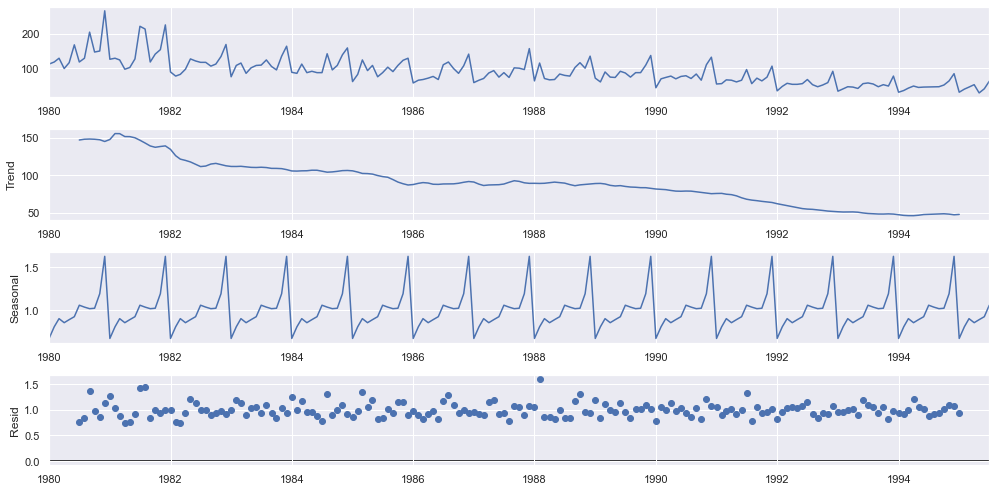

In [26]:
decomposition_m = seasonal_decompose(rose,model='multiplicative')
decomposition_m.plot();

* The time series is decomposed and a decreasing trend is observed. Also the residuals look random and in general not with high deviations.


In [27]:
trend = decomposition_m.trend
seasonality = decomposition_m.seasonal
residual = decomposition_m.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

In [28]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.841592
1980-08-01    148.965720
1980-09-01    149.732674
1980-10-01    149.054104
1980-11-01    148.270045
1980-12-01    146.254646
dtype: float64

## 3. Split the data into training and test. The test data should start in 1991.

**The test data is selected starting from 1991.**


In [29]:
train = rose[rose.index.year < 1991]
test = rose[rose.index.year > 1990]

In [30]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [31]:
print('Length of Train Data:', len(train))
print('Length of Test Data:', len(test))

Length of Train Data: 132
Length of Test Data: 55


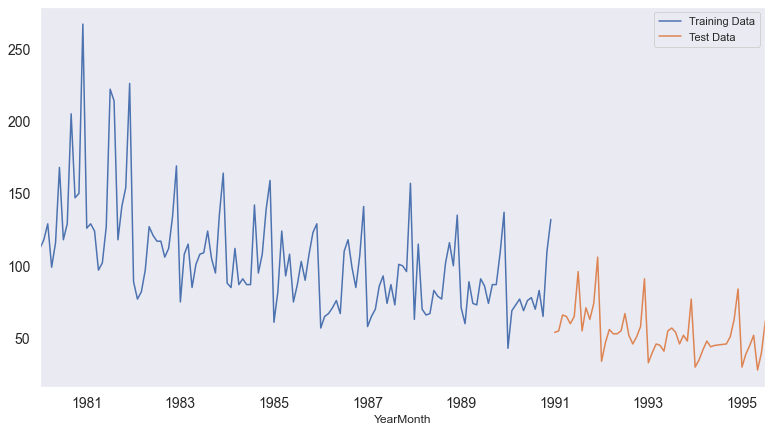

In [32]:
train['Rose'].plot(figsize=(13,7), fontsize=14)
test['Rose'].plot(figsize=(13,7), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

**Inferences :**
* The train test split is done with the test data staring from the year 1991.
* There 131 values in the Train set and 57 values in the test set.
* The starting and ending values are also observed for the train and test set.
* A plot showing the train and test together is also observed.

## Building different models and comparing the accuracy metrics.


# Model 1: Linear Regression

**Steps:**
* Generating a Linear numerical time instance order for both the training and test set and then adding it to the dataset.
* Build a Linear Regression Model.
* Predict the output and measure RMSE on Test Data.

In [33]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


* We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [34]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [35]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [36]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

### Plot-Linear regression

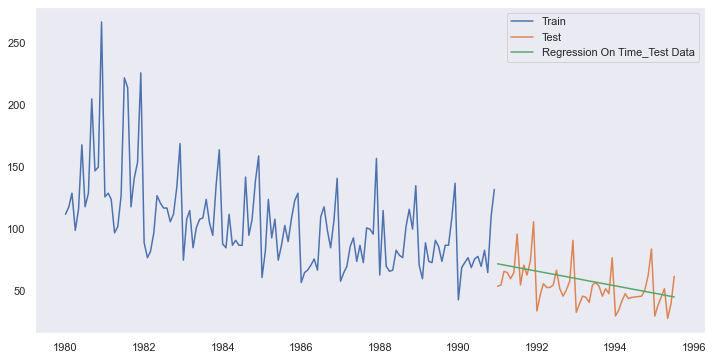

In [37]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(12,6))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [38]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [39]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression On Time'])
resultsDf

,Test RMSE
Regression On Time,15.268955


* The Linear Regression model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 15.2  approximately.


## Model 2: Naive Approach: y^t+1=yt

**For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.**

In [40]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [41]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

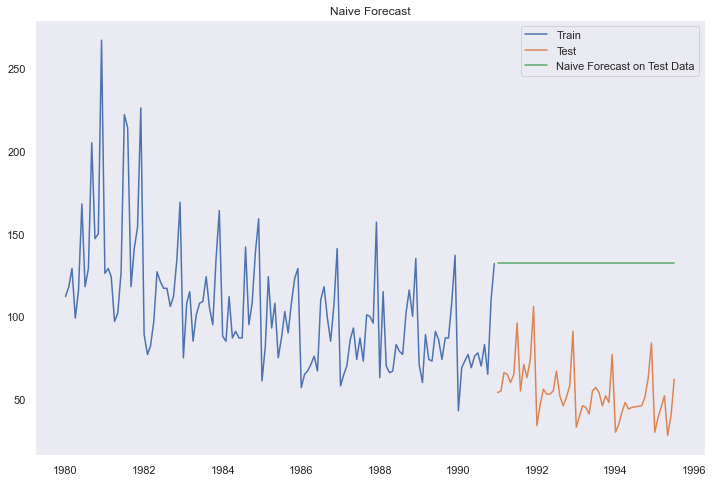

In [42]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

**Model Evaluation**

In [43]:
## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [44]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773


* The Naive model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 79.7 approximately.


## Method 3: Simple Average
**For this particular simple average method, we will forecast by using the average of the training values.**

In [45]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [46]:
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()

In [47]:
SimpleAverage_train['time'] = train_time
SimpleAverage_test['time'] = test_time
print('First few rows of Training Data','\n',SimpleAverage_train.head(),'\n')
print('Last few rows of Training Data','\n',SimpleAverage_train.tail(),'\n')
print('First few rows of Test Data','\n',SimpleAverage_test.head(),'\n')
print('Last few rows of Test Data','\n',SimpleAverage_test.tail(),'\n')

First few rows of Training Data 
              Rose  mean_forecast  time
YearMonth                             
1980-01-01  112.0     104.939394     1
1980-02-01  118.0     104.939394     2
1980-03-01  129.0     104.939394     3
1980-04-01   99.0     104.939394     4
1980-05-01  116.0     104.939394     5 

Last few rows of Training Data 
              Rose  mean_forecast  time
YearMonth                             
1990-08-01   70.0     104.939394   128
1990-09-01   83.0     104.939394   129
1990-10-01   65.0     104.939394   130
1990-11-01  110.0     104.939394   131
1990-12-01  132.0     104.939394   132 

First few rows of Test Data 
             Rose  mean_forecast  time
YearMonth                            
1991-01-01  54.0     104.939394   133
1991-02-01  55.0     104.939394   134
1991-03-01  66.0     104.939394   135
1991-04-01  65.0     104.939394   136
1991-05-01  60.0     104.939394   137 

Last few rows of Test Data 
             Rose  mean_forecast  time
YearMonth         

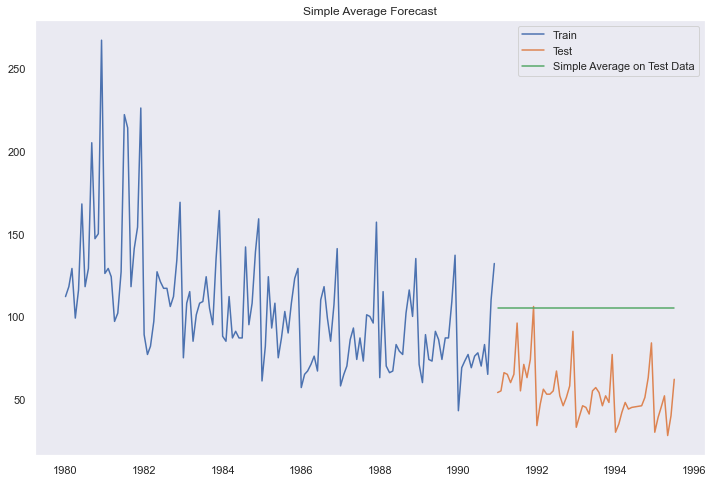

In [48]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

**Model Evaluation**

In [49]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [50]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570


* The Simple Average model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 53.4 approximately.


## Method 4: Moving Average(MA)
**For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.**

In [51]:
MovingAverage = rose.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


**Trailing moving averages**

In [52]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


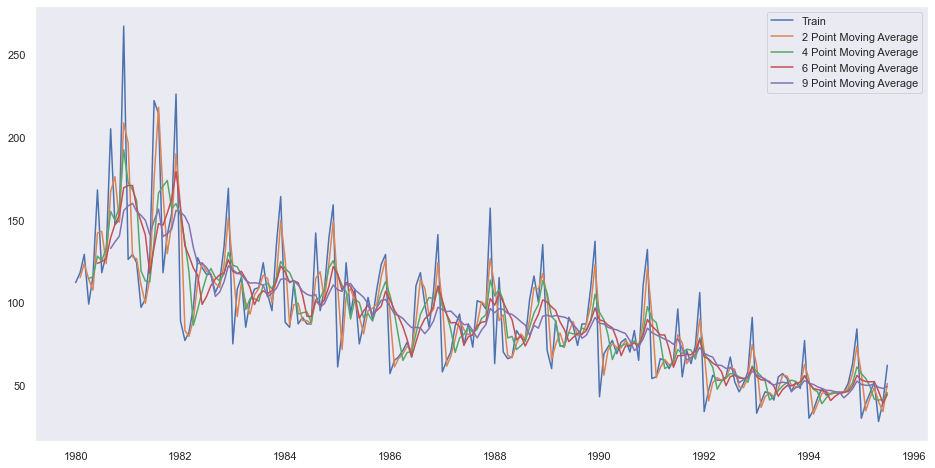

In [53]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

* Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [54]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

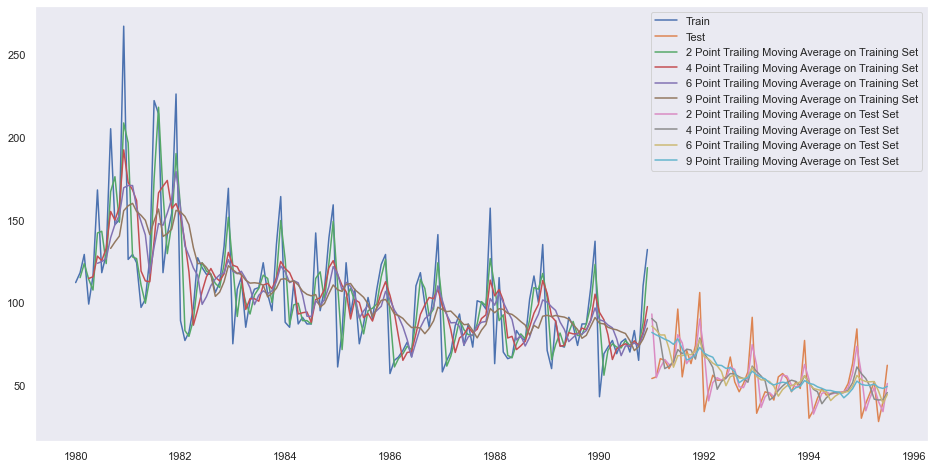

In [55]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

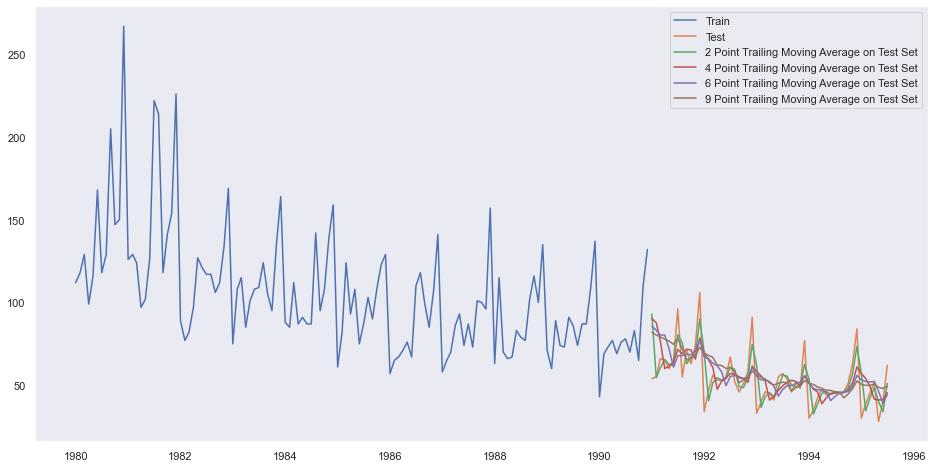

In [56]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();
# Visualizing separately for test set 

**Model Evaluation**

**Done only on the test data.**

In [57]:
## Test Data - RMSE  --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))
# Out of all 2 point moving average seems better. 

For 2 point Moving Average Model forecast on the Training Data, RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [58]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf
     

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

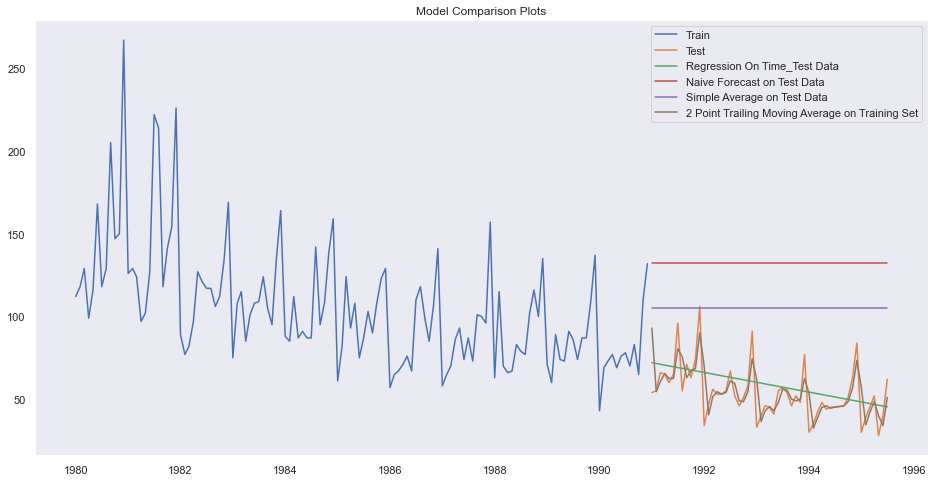

In [59]:
## Plotting on both Training and Test data
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.title("Model Comparison Plots")
plt.legend(loc='best')
plt.grid()
plt.show()

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Simple Exponential Smoothing

* The Simple Exponential Smoothing has the 'smoothing level' parameter  which is optimized using inbuilt hyperparameter 'optimized' and also optimized iteratively based on Test RMSE values.
* Build the Simple Exponential Smoothing model.
* Predict the output and measure RMSE on Test Data.

In [60]:
SES_train = train.copy()
SES_test = test.copy()

In [61]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Auto fit Model:**

In [62]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [63]:
model_SES_autofit.params 

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
alpha = model_SES_autofit.params['smoothing_level']
print(alpha)

0.09874995336438987


In [65]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2.head()

1991-01-01    87.105001
1991-02-01    87.105001
1991-03-01    87.105001
1991-04-01    87.105001
1991-05-01    87.105001
Freq: MS, dtype: float64

### Model Evaluation for α = 0.995 : Simple Exponential Smoothing

In [66]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 36.796


In [67]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.098:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243


* It is observed that for Single Exponential smoothing using the optimized method on Train data gives an RMSE value of 36.8 approximately for smoothing level  = 0.098.

**Adjusting various alpha levels.
More weight is placed on the most recent observation the higher the alpha value.
To discover which specific value for alpha on the test set performs best, we shall iteratively run a loop with several alpha values.**

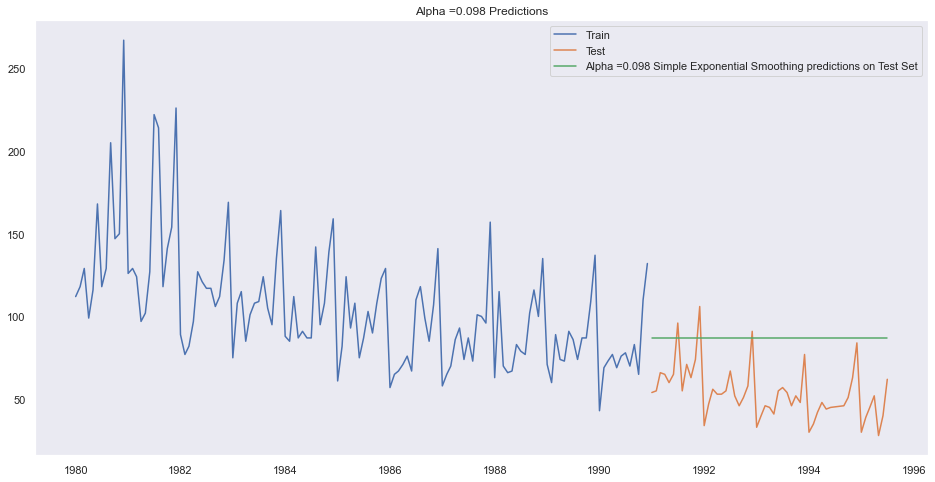

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(test_predictions_model2, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

* Setting different alpha values. Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set

### Double Exponential Smoothing (Holt's Model)

* The Double Exponential Smoothing has two parameters 'smoothing level' (α) and 'smoothing_slope' (β) parameter which are optimized using inbuilt hyperparameter 'optimized' and also optimized iteratively based on Test RMSE values.
* Build the Double Exponential Smoothing model.
* Predict the output and measure RMSE on Test Data.

**Auto fit Model:**

In [69]:
DES_train = train.copy()
DES_test = test.copy()

In [70]:
model_DES = Holt(DES_train['Rose'])
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Auto fit Model:**

In [71]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.129813,True
smoothing_trend,beta,0.053762,True
initial_level,l.0,145.730706,True
initial_trend,b.0,-0.100696,True


In [72]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
gamma = model_DES_autofit.params['smoothing_seasonal']
print(alpha)
print(beta)

0.12981260063088668
0.05376220098709802


In [73]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3.head()

1991-01-01    86.161875
1991-02-01    86.247204
1991-03-01    86.332532
1991-04-01    86.417860
1991-05-01    86.503188
Freq: MS, dtype: float64

In [74]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 38.282


In [75]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548


## Triple Exponential Smoothing model

**Triple Exponential Smoothing (Holt - Winter's Model)**

**Three parameters α, β and γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.**

In [76]:
TES_train = train.copy()
TES_test = test.copy()

In [77]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [78]:
model_TES_autofit = model_TES.fit(optimized=True)

**Auto Fit Model**

In [79]:
model_TES_autofit.params

{'smoothing_level': 0.07132109562890512,
 'smoothing_trend': 0.04553831096563722,
 'smoothing_seasonal': 8.356711212063695e-07,
 'damping_trend': nan,
 'initial_level': 134.25655591779326,
 'initial_trend': -0.8038265942903572,
 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
        1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
        1.40577823, 1.93832412]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
print(alpha)
print(beta)
print(gamma)

0.07132109562890512
0.04553831096563722
8.356711212063695e-07


In [81]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4.head()

1991-01-01    56.334597
1991-02-01    63.692059
1991-03-01    69.388935
1991-04-01    60.452304
1991-05-01    67.770362
Freq: MS, dtype: float64

In [82]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 20.191


In [83]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998


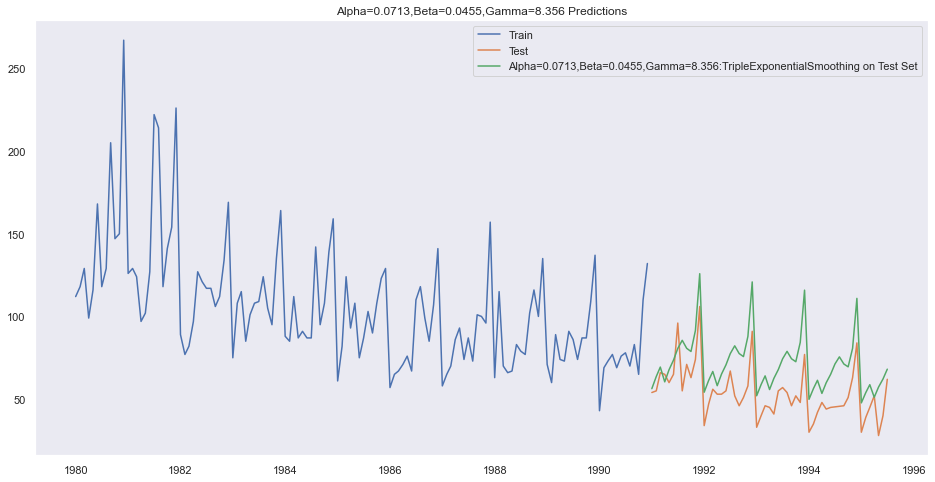

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(test_predictions_model4, label='Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.0713,Beta=0.0455,Gamma=8.356 Predictions');

### Finding exponential model that performs best


**Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.3 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.**



**Iterative Method for Simple Exponential Smoothing model:**

In [85]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Train RMSE,Test RMSE


In [86]:
for i in np.arange(0,1.05,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test['Rose']))
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

In [87]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
2,0.10,31.815610,36.828033
1,0.05,32.449102,37.011448
3,0.15,31.809845,38.722125
4,0.20,31.979391,41.361876
5,0.25,32.211871,44.360796
6,0.30,32.470164,47.504821
7,0.35,32.744341,50.665672
8,0.40,33.035130,53.767406
9,0.45,33.346578,56.767133
10,0.50,33.682839,59.641786


In [88]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.10,SimpleExponentialSmoothing-Iter'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998


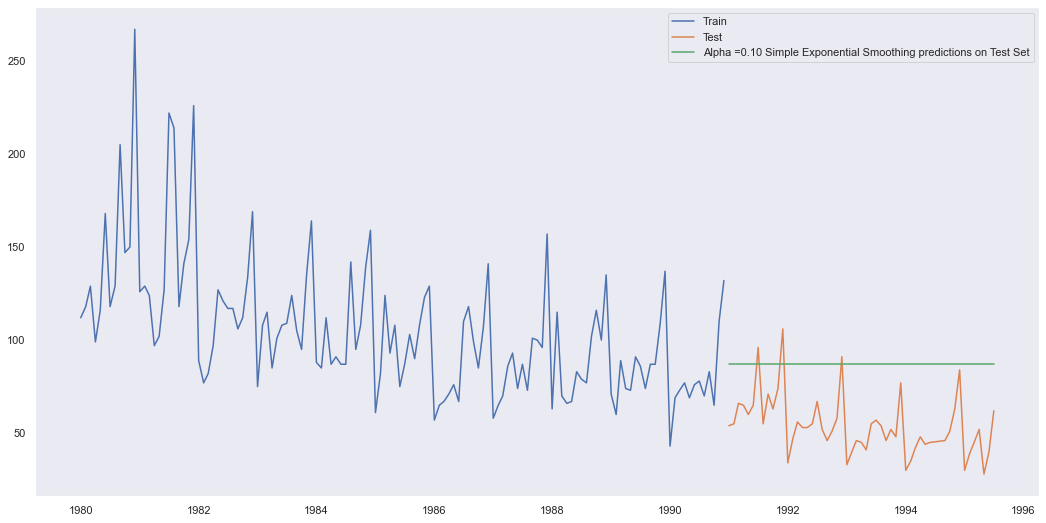

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict', 0.10], label='Alpha =0.10 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

**Iterative Method for Double Exponential Smoothing**

In [90]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [91]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False),2)
        
        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False),2)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

In [92]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.44,36.92
1,0.1,0.2,33.45,48.69
10,0.2,0.1,33.10,65.73
2,0.1,0.3,33.15,78.16
20,0.3,0.1,33.61,98.65
...,...,...,...,...
78,0.8,0.9,51.76,1052.46
68,0.7,0.9,48.54,1061.85
79,0.8,1.0,53.84,1095.11
59,0.6,1.0,47.19,1102.09


In [93]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1 & Beta=0.1,DoubleExponentialSmoothing-Iter'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998


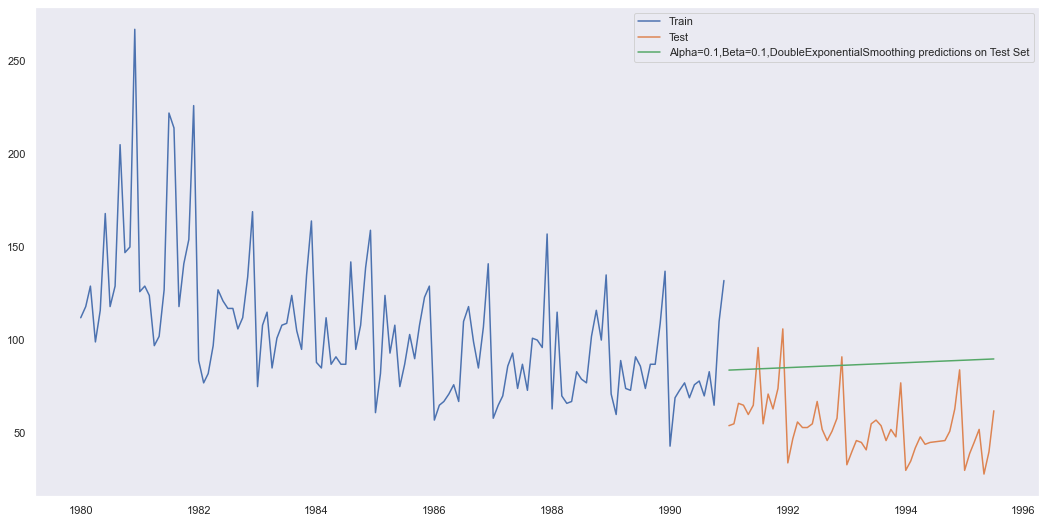

In [94]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict',0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

**Iterative Method for Triple Exponential Smoothing**

In [95]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [96]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

In [97]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Train RMSE
8,0.1,0.2,0.3,9.888106e+00,20.871304
112,0.2,0.5,0.3,9.891550e+00,23.656276
177,0.3,0.3,0.4,1.016402e+01,24.588120
185,0.3,0.4,0.4,1.037178e+01,25.599445
9,0.1,0.2,0.4,1.037437e+01,21.613205
...,...,...,...,...,...
453,0.6,0.7,0.8,2.555513e+05,200.708579
784,1.0,0.9,0.3,2.976504e+05,4978.410761
782,1.0,0.8,0.9,3.847832e+05,6456.216893
148,0.2,0.9,0.7,1.079274e+06,31453.789450


In [98]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1,Beta=0.2,Gamma=0.3:TripleExponentialSmoothing-Iter'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998


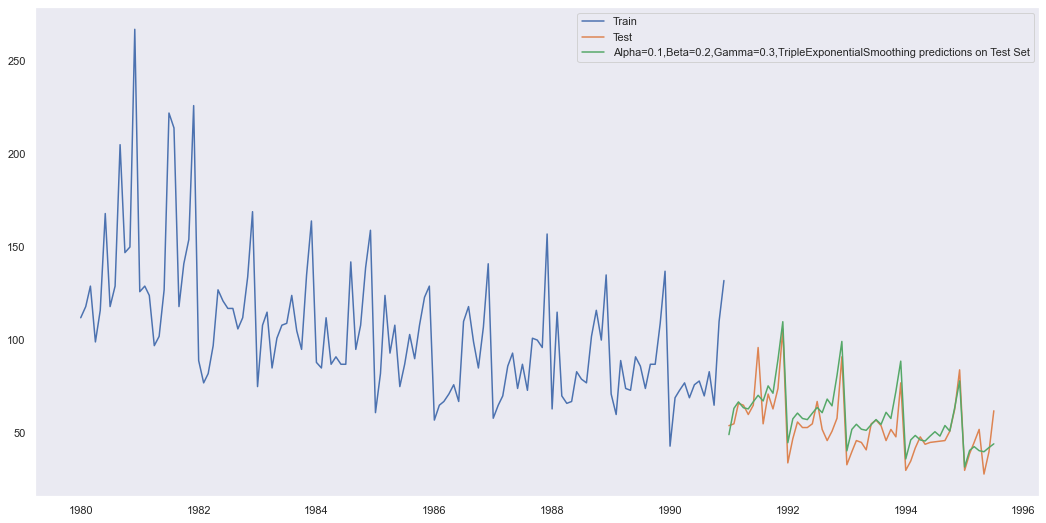

In [99]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1,0.2, 0.3], label='Alpha=0.1,Beta=0.2,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data


In [100]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

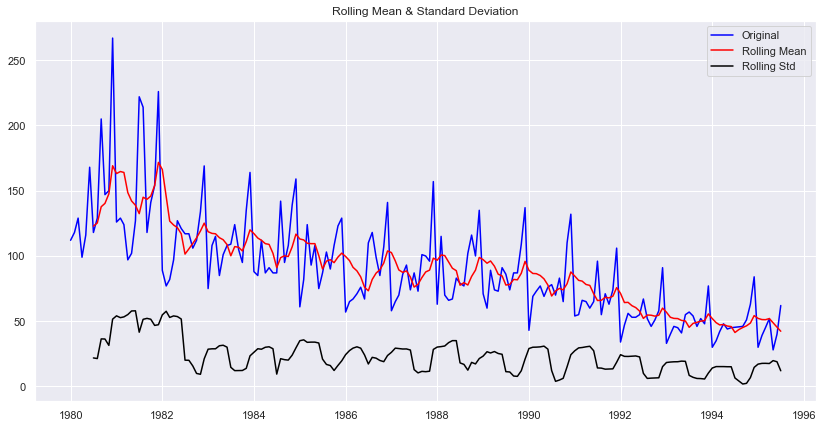

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [101]:
test_stationarity(rose['Rose'])

### Lets try check for stationarity after taking first order differencing


* Differencing method used to make the non-stationary time series of Rose wine to stationary



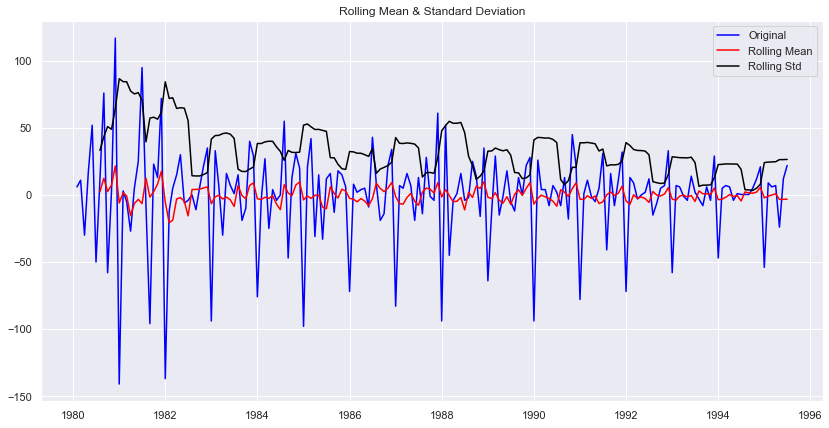

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [102]:
test_stationarity(rose['Rose'].diff().dropna())

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Auto -ARIMA Model(Using AIC )

* Series is not sationary and hence differencing would be required.For an Auto -Arima ,we calculate the best p and q parameters by looking at the lowest Akaike Information Criterion(AIC )values.

In [103]:
import itertools
p = range(0, 5)
q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model:')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model:
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)


In [104]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [105]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535743
ARIMA(0, 1, 3) - AIC:1280.5453761734657
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.8707223310007
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.5078621868597
ARIMA(2, 1, 2) - AIC:1281.8707222264215


C:\Users\msair\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.695136341693
ARIMA(3, 1, 0) - AIC:1297.4810917271702
ARIMA(3, 1, 1) - AIC:1282.419277627203
ARIMA(3, 1, 2) - AIC:1283.720740597714


C:\Users\msair\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) - AIC:1278.6613049048526
ARIMA(4, 1, 0) - AIC:1296.3266569004657
ARIMA(4, 1, 1) - AIC:1283.793171512309
ARIMA(4, 1, 2) - AIC:1285.7182485638677
ARIMA(4, 1, 3) - AIC:1278.451410215743


C:\Users\msair\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [106]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 3)",1274.695136
19,"(4, 1, 3)",1278.45141
15,"(3, 1, 3)",1278.661305
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.57423
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722


* ARIMA (0,1,2) has a lowest AIC values

### Summary of Auto-ARIMA 

In [107]:
mod = ARIMA(train, order=ARIMA_AIC['param'][0], freq=train.index.inferred_freq)

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.577
Date:                Sun, 25 Dec 2022   AIC                           1333.155
Time:                        10:57:02   BIC                           1336.030
Sample:                    01-01-1980   HQIC                          1334.323
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1515.6738    122.418     12.381      0.000    1275.740    1755.608
Ljung-Box (L1) (Q):                  17.11   Jarque-Bera (JB):                59.55
Prob(Q):                              0.00   Pr

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Predict on the Test Set using this model and evaluate the model.**


In [108]:
predict_test = results_Arima.predict(start='1991-01-01',end='1995-07-01',typ='levels')

### Auto ARIMA(0,1,2) using AIC plot

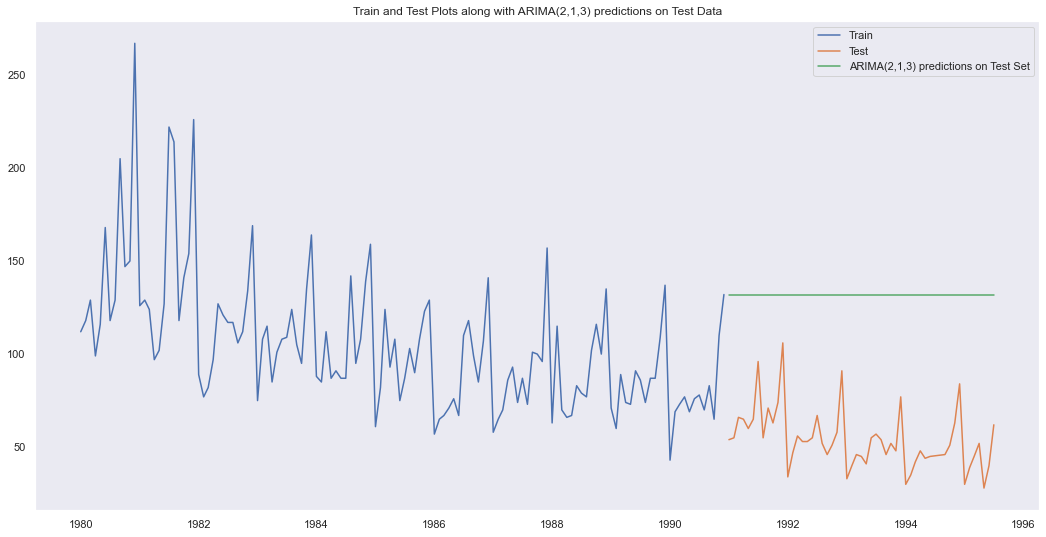

In [109]:
plt.figure(figsize=(18,9))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predict_test, label='ARIMA(2,1,3) predictions on Test Set')
plt.title('Train and Test Plots along with ARIMA(2,1,3) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

Inferences:

Since the series has seasonality, we observe that the ARIMA model build on it is not appropriate and we need to build a SARIMA model and derive the p,q parameters from the acf and pacf plots after considering the seasonal difference as well.

**Model Evaluation:**

In [110]:
rmse = np.sqrt(mean_squared_error(test,predict_test))
print("Auto - ARIMA Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

Auto - ARIMA Model forecast on the Test Data,  RMSE is 79.719


In [111]:
resultsDf_a = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2) Best AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_a])
resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998


### Seasonal Difference:

### Automated Sarima Model (Using AIC)

As the data has seasonality .Lets build the model with SARIMA.For an Auto-SARIMA ,the parameters pdq and PDQ are selected based on lowest Akaike Information Criterion (AIC)values

Setting the seasonality as 12 for the first iteration of the auto SARIMA mode

In [112]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [113]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [114]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720741
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380891
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301630444
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776008
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385804
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635754128
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658806
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601624
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654778
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\msair\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697579
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945637
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374412
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729147628
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244225685
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383899
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133562912
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.073060671788
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809266192
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491829
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094686
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483301973
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655531254
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520105
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670416823
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535874
SARIMA(0, 1, 1)x(2, 0, 1, 1

* Top 5 best AIC values for Auto -Sarima Model

In [115]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
107,"(1, 1, 2)","(2, 1, 2, 12)",776.940108
161,"(2, 1, 2)","(2, 1, 2, 12)",776.996101
35,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
160,"(2, 1, 2)","(2, 1, 1, 12)",783.703652


* Lowest AIC value for SARIMA is (0, 1, 2)(2, 0, 2, 12)

### Summary of Sarimax

In [116]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 25 Dec 2022   AIC                            887.938
Time:                                    10:58:20   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.987     -0.004      0.996    -373.211     371.526
ma.L2         -0.1573     29.848   

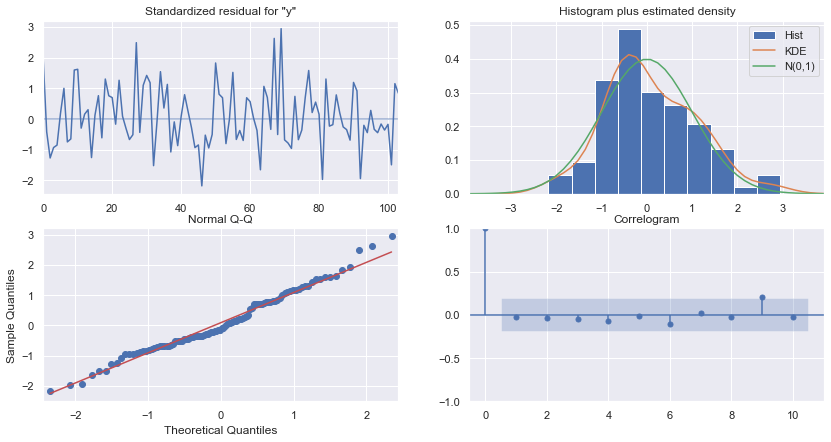

In [117]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Inferences:
It is observed from above that Residual is nearly Standard Normally distributed and Correlogram shows that there is no correlation in the residuals. Both this suggests that the SARIMA model captures the information and is a good enough model.

### Predict on the Test Set using this model and evaluate the model.

In [118]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [119]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867265,15.928501,31.647977,94.086553
1,70.541190,16.147659,38.892360,102.190021
2,77.356411,16.147657,45.707586,109.005236
3,76.208814,16.147657,44.559988,107.857639
4,72.747398,16.147657,41.098573,104.396224


In [120]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.928362140323028


In [121]:
temp_resultsDf_auto_SARIMA= pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12) Best AIC'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_SARIMA])

resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998


### Model Plot for SARIMA

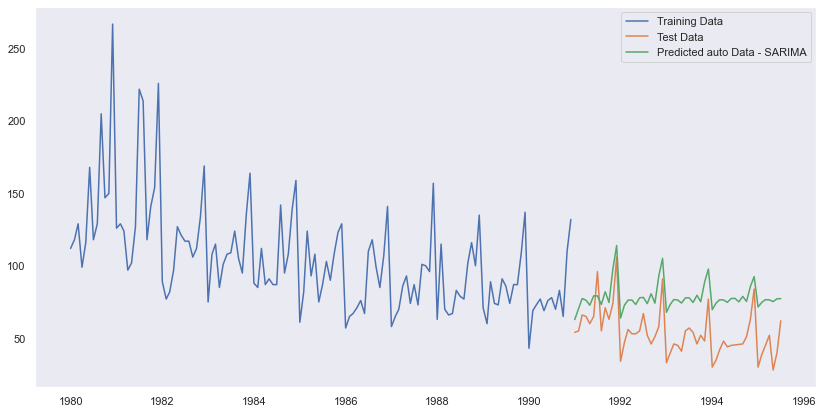

In [122]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted auto Data - SARIMA')
plt.legend(loc='best')
plt.grid();

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### ACF & PACF Plots

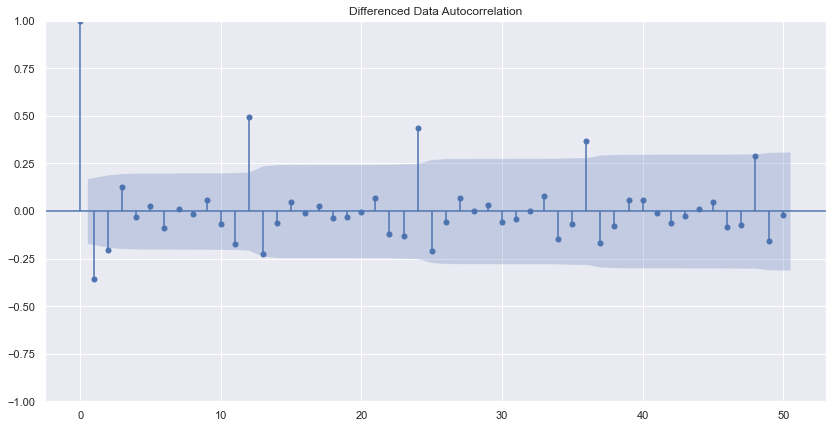

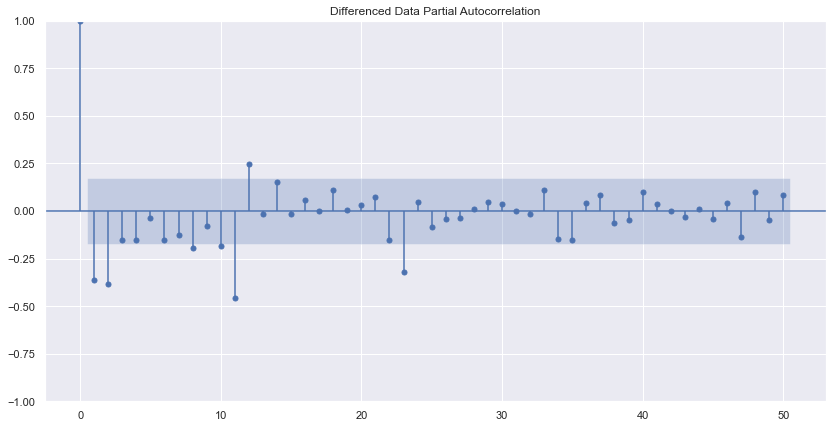

In [123]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Seasonality after certain 12 lags that is every 12 months is viisble in plots

Inference using the first order differenced time series Acf and Pacf plot we will calculate the values of p,d,q . Here p =4(PACF plot)4 lag are falling outside the significance blue band range,d=1(order of differenceing is 1 as original series was non-stationary but became stationary after differencing) ,and q=3(ACF plot)-three lags are falling above the significance blue band range. Seasonality after 12 lags is seen in plots .ACF & PACF plot are done using 95% confidence interval bands.

### Method 9: Manual ARIMA Model 

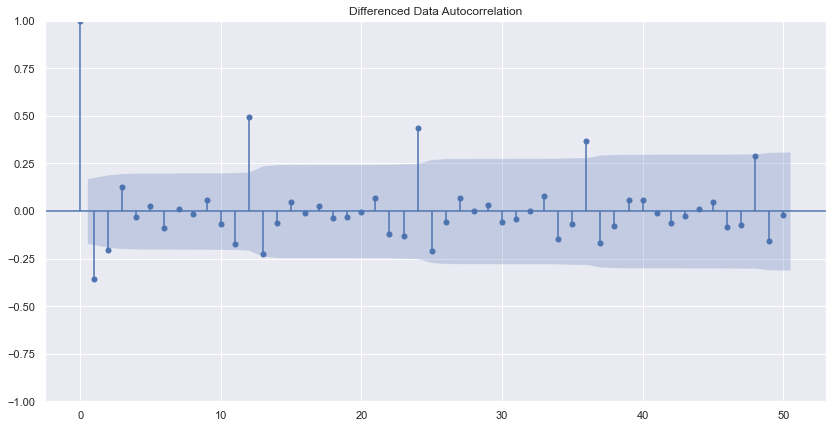

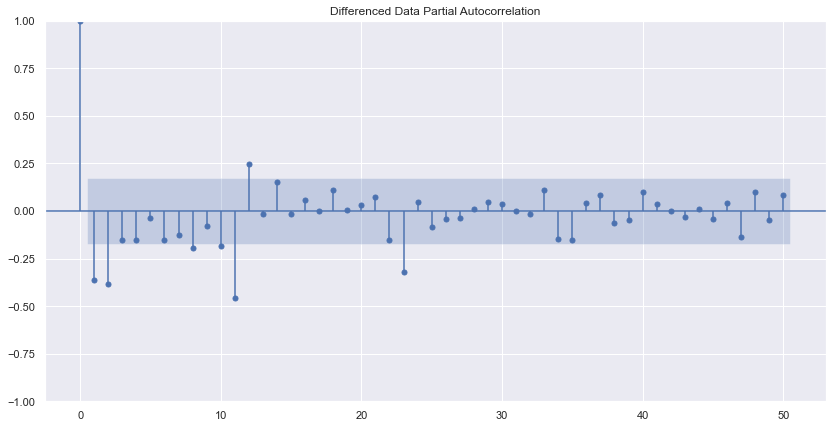

In [124]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [125]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,2))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 25 Dec 2022   AIC                           1281.871
Time:                        10:58:22   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [126]:
predict_test = results_manual_ARIMA.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [127]:
predict_test.head()

1991-01-01    91.159512
1991-02-01    85.314628
1991-03-01    87.962468
1991-04-01    86.759563
1991-05-01    87.306038
Freq: MS, Name: predicted_mean, dtype: float64

### Predict on the Test Set using Manual Arima model and evaluate the model


In [128]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))  

In [129]:
rmse = np.sqrt(mean_squared_error(test,predict_test))
print("ARIMA(2,1,2) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

ARIMA(2,1,2) Model forecast on the Test Data,  RMSE is 36.871


### ARIMA Model Evaluation-Using ACF & PACF Plots

In [130]:
temp_resultsDfARIMA1 = pd.DataFrame({'Test RMSE': [rmse]},index=['Manual ARIMA(2,1,2) '])


resultsDf = pd.concat([resultsDf,temp_resultsDfARIMA1])

resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998


### Method 10: Manual Sarima model

In [131]:
import statsmodels.api as sm

SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_12 = SARIMA_12.fit(maxiter=1000)
print(results_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -443.798
Date:                              Sun, 25 Dec 2022   AIC                            905.596
Time:                                      10:58:22   BIC                            929.308
Sample:                                           0   HQIC                           915.200
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8065      0.131     -6.169      0.000      -1.063      -0.550
ar.L2          0.05

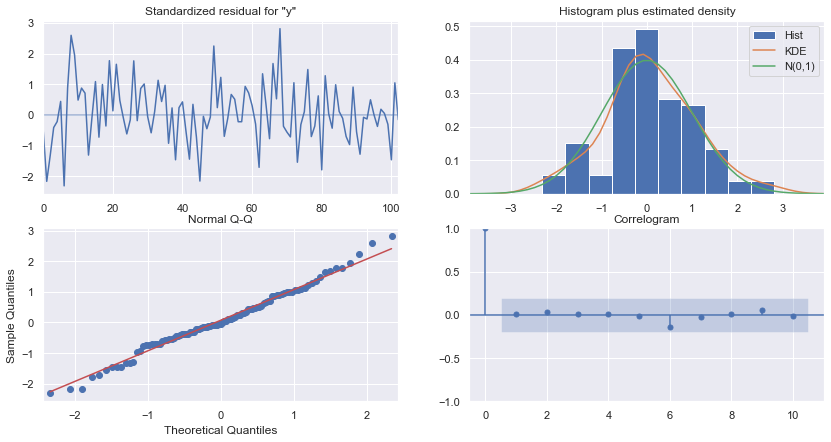

In [132]:
results_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.


In [133]:
predicted_manual_SARIMA = results_SARIMA_12.get_forecast(steps=len(test['Rose']))

In [134]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,47.771617,17.783740,12.916127,82.627106
1,59.656058,18.637175,23.127867,96.184249
2,68.181573,18.670811,31.587456,104.775690
3,70.478001,18.675115,33.875448,107.080555
4,60.799078,18.674968,24.196814,97.401343


In [135]:
rmse_SARIMA_manual_model = metrics.mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print("For Manual-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_manual_model))

For Manual-SARIMA Model forecast on the Test Data, RMSE is 15.457


### SARIMA model by picking pdq and PDQ from ACF and PACF plots.

In [136]:
temp_results_Sarima_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA (4,1,3)(3,0,2,12) '] )


resultsDf = pd.concat([resultsDf,temp_results_Sarima_12])

resultsDf

,Test RMSE
Regression On Time,15.268955
Naive Model,79.718773
Simple Average Model,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.129,Beta=0.053:DoubleExponentialSmoothing",38.281548
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998


## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [137]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.3:TripleExponentialSmoothing-Iter",9.888106
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Regression On Time,15.268955
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998
"SARIMA(0, 1, 2)(2, 0, 2, 12) Best AIC",26.928362
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.10,SimpleExponentialSmoothing-Iter",36.828033


* The lowest RMSE score is 9.88 approximately for the model Triple Exponential Smoothing Iterative Model with parameters Alpha=0.03, Beta=0.4 and Gamma=0.3.


## Conclusion:

A data frame is build based on all the models along with their corresponding parameters and the Test RMSE is observed. The lowest RMSE score is 9.88 approximately for the model Triple Exponential Smoothing Iterative Model with parameters Alpha=0.03, Beta=0.4 and Gamma=0.3.

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [138]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.3:TripleExponentialSmoothing-Iter",9.888106
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Regression On Time,15.268955
"Alpha=0.0713,Beta=0.0455,Gamma=8.356:TripleExponentialSmoothing",20.190998
"SARIMA(0, 1, 2)(2, 0, 2, 12) Best AIC",26.928362
Alpha=0.098:SimpleExponentialSmoothing,36.796243
"Alpha=0.10,SimpleExponentialSmoothing-Iter",36.828033


# Build model on the entire dataset using best optimum model:

### Building a TES with param[Alpha=0.1,Beta=0.2,gamma=0.3] on the entire Rose dataset

In [163]:
Full_model = ExponentialSmoothing(rose['Rose'],
                                  trend='additive',
                                  seasonal='multiplicative')
Full_model_fit = Full_model.fit(smoothing_level=0.1,
                                         smoothing_trend=0.2,
                                         smoothing_seasonal=0.3,
                                         optimized=True,use_brute=True)

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [165]:
rmse_rose_full = metrics.mean_squared_error(rose['Rose'],Full_model_fit.fittedvalues,squared=False)
print("For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_rose_full))

For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is 17.886


**Forecast for the next 12 months using this model.**


In [176]:
prediction = fullmodel.forecast(steps=12)

In [166]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
pred_rose = pd.DataFrame({'lower_CI':prediction - ((np.percentile(prediction,[2.5,97.5])))[0],
                          'prediction':prediction,
                          'upper_ci': prediction + ((np.percentile(prediction,[2.5,97.5])))[1]})
pred_rose

,lower_CI,prediction,upper_ci
1995-08-01,14.248639,47.173333,122.744753
1995-09-01,14.378867,47.303561,122.874981
1995-10-01,17.283400,50.208094,125.779514
1995-11-01,25.114204,58.038898,133.610318
1995-12-01,49.296992,82.221687,157.793107
1996-01-01,-2.128323,30.796372,106.367792
1996-02-01,5.611032,38.535727,114.107147
1996-03-01,11.895676,44.820370,120.391790
1996-04-01,14.882536,47.807230,123.378650
1996-05-01,5.808948,38.733643,114.305062


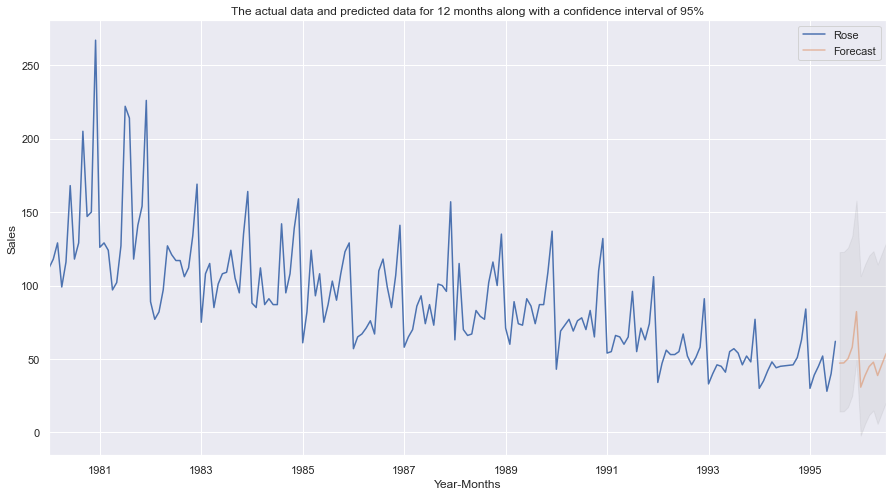

In [167]:
axis = rose.plot(label='Actual', figsize=(15,8))
pred_rose['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_rose.index, pred_rose['lower_CI'], pred_rose['upper_ci'], color='k', alpha=.05)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('The actual data and predicted data for 12 months along with a confidence interval of 95%')
plt.legend(loc='best')
plt.show()

## 10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [171]:
TES_rose_forecast

1995-08-01    47.173333
1995-09-01    47.303561
1995-10-01    50.208094
1995-11-01    58.038898
1995-12-01    82.221687
1996-01-01    30.796372
1996-02-01    38.535727
1996-03-01    44.820370
1996-04-01    47.807230
1996-05-01    38.733643
1996-06-01    46.252423
1996-07-01    53.574891
Freq: MS, dtype: float64

In [172]:
TES_rose_forecast.describe()

count    12.000000
mean     48.788852
std      12.742781
min      30.796372
25%      43.298689
50%      47.238447
75%      51.049794
max      82.221687
dtype: float64

In [173]:
TES_rose_forecast.sum()

585.4662296037211

In [ ]:
Forecast_manual_SARIMA_date['mean'].sum()

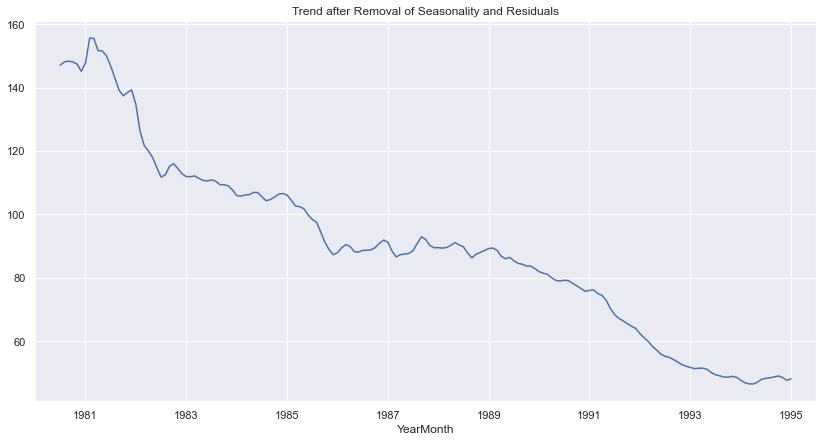

In [145]:
decomposition_m.trend.plot()
plt.title('Trend after Removal of Seasonality and Residuals');

Inferences:
    
By observing the Trend it may be observed that there is an overall decreasing Trend in the Wine sales.

### Insights from the Model Build:

In [146]:
print('Forecast from 1995-08-01 to 1996-07-01:')
prediction

Forecast from 1995-08-01 to 1996-07-01:


1995-08-01    47.173333
1995-09-01    47.303561
1995-10-01    50.208094
1995-11-01    58.038898
1995-12-01    82.221687
1996-01-01    30.796372
1996-02-01    38.535727
1996-03-01    44.820370
1996-04-01    47.807230
1996-05-01    38.733643
1996-06-01    46.252423
1996-07-01    53.574891
Freq: MS, dtype: float64

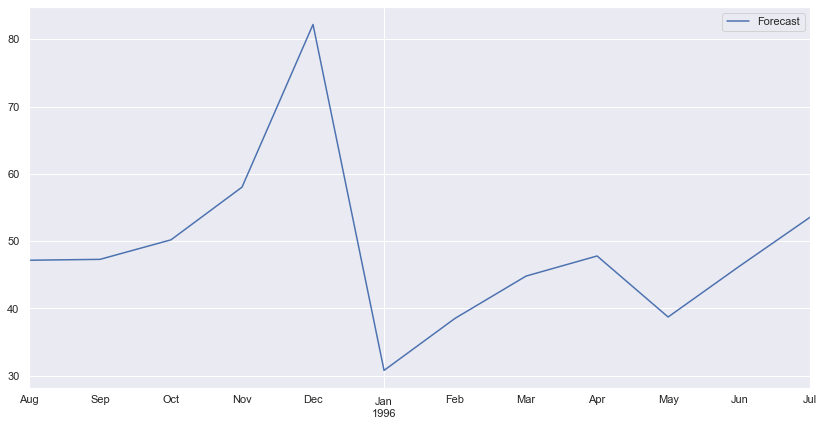

In [147]:
prediction.plot(label = 'Forecast');
plt.legend(loc='best')
plt.show()